In [2]:
#importing and file reading

import pandas as pd
car_price = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
car_price.dtypes
car_price.info()     #no null values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
# Display descriptions for each feature.
descriptions = {
    'car_ID': "Unique identifier for each car",
    'symboling': "Insurance risk rating for the car",
    'CarName': "Name or model of the car",
    'fueltype': "Type of fuel used (gas or diesel)",
    'aspiration': "Method of air intake for the engine (std or turbo)",
    'doornumber': "Number of doors on the car",
    'carbody': "Type of car body or design (sedan, hatchback, etc.)",
    'drivewheel': "Type of drivetrain or wheels (FWD, RWD, 4WD)",
    'enginelocation': "Engine location (front or rear)",
    'wheelbase': "Distance between front and rear axles",
    'carlength': "Length of the car",
    'carwidth': "Width of the car",
    'carheight': "Height of the car",
    'curbweight': "Weight of the car without passengers or cargo",
    'enginetype': "Type of engine (ohc, ohcv, etc.)",
    'cylindernumber': "Number of cylinders in the engine",
    'enginesize': "Size of the engine (in cc or ci)",
    'fuelsystem': "Type of fuel injection system (mpfi, etc.)",
    'boreratio': "Ratio of cylinder bore diameter to stroke length",
    'stroke': "Length of the engine stroke",
    'compressionratio': "Engine compression ratio",
    'horsepower': "Engine power output (in hp)",
    'peakrpm': "Engine's peak RPM for generating power",
    'citympg': "Fuel efficiency in city driving (mpg)",
    'highwaympg': "Fuel efficiency on the highway (mpg)",
    'price': "Price of the car"
}

for i in car_price.columns:
    print(f"{i}: {descriptions.get(i, 'No description available')}")

car_ID: Unique identifier for each car
symboling: Insurance risk rating for the car
CarName: Name or model of the car
fueltype: Type of fuel used (gas or diesel)
aspiration: Method of air intake for the engine (std or turbo)
doornumber: Number of doors on the car
carbody: Type of car body or design (sedan, hatchback, etc.)
drivewheel: Type of drivetrain or wheels (FWD, RWD, 4WD)
enginelocation: Engine location (front or rear)
wheelbase: Distance between front and rear axles
carlength: Length of the car
carwidth: Width of the car
carheight: Height of the car
curbweight: Weight of the car without passengers or cargo
enginetype: Type of engine (ohc, ohcv, etc.)
cylindernumber: Number of cylinders in the engine
enginesize: Size of the engine (in cc or ci)
fuelsystem: Type of fuel injection system (mpfi, etc.)
boreratio: Ratio of cylinder bore diameter to stroke length
stroke: Length of the engine stroke
compressionratio: Engine compression ratio
horsepower: Engine power output (in hp)
peak

In [7]:
data = car_price.copy()
#dropping noisy and irrelevant data
data1 = data.drop('car_ID',axis=1)

data1.head(10)
data1.tail(10)

#checking for duplicate values if any
print("Duplicate values = ",data1.duplicated().sum())

#checking for null values
print("Null values =\n", data1.isnull().sum(axis=0),
      "\n------------------------------",
      "\nNO NULL VALUES FOUND ")

Duplicate values =  0
Null values =
 symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64 
------------------------------ 
NO NULL VALUES FOUND 


In [8]:
#descriptive stats finding manually
numerical = []
for i in data1.columns:
    if data1[i].dtype in [int, float, 'int64','float64']:
        numerical.append(i)

category =[]
for i in data1.columns:
    if data1[i].dtype in ['object']:
        category.append(i)
        
        
'''num_col = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 
              'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
              'citympg', 'highwaympg', 'price']'''

"num_col = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', \n              'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',\n              'citympg', 'highwaympg', 'price']"

In [14]:
import statistics as st
from scipy.stats import mode
import scipy.stats as stat

for column in numerical:
    data_column = data1[column]             #extraxt columns from dataframe for operations
    print(f"\nStatistic for '{column}':")
    print(f"Count: {data_column.count()}")  #from pandas
    print(f"Mean: {st.mean(data_column)}")  
    print(f"Median: {st.median(data_column)}")
    print(f"Mode: {mode(data_column,keepdims = 'TRUE').mode[0]}")  #from scipy
    print(f"Variance: {st.variance(data_column)}")
    print(f"Standard Deviation: {st.stdev(data_column)}")
    print(f"Minimum: {data_column.min()}")  #from pandas
    print(f"25th Percentile: {data_column.quantile(0.25)}")
    print(f"50th Percentile (Median): {data_column.median()}")
    print(f"75th Percentile: {data_column.quantile(0.75)}")
    print(f"Maximum: {data_column.max()}")
    
for column in category:
    data_column = data1[column]
    print(f"\nStatistic for {column} :")
    print(f"Count: {data_column.count()}")
    print(f"Unique: {data_column.nunique()}")
    print(f"Top: {data_column.mode().iloc[0]}")
    print(f"Mode: {data_column.value_counts().iloc[0]}")


Statistic for 'symboling':
Count: 205
Mean: 0.8341463414634146
Median: 1
Mode: 0
Variance: 1.5507890961262554
Standard Deviation: 1.2453068281055297
Minimum: -2
25th Percentile: 0.0
50th Percentile (Median): 1.0
75th Percentile: 2.0
Maximum: 3

Statistic for 'wheelbase':
Count: 205
Mean: 98.75658536585365
Median: 97.0
Mode: 94.5
Variance: 36.261782400765185
Standard Deviation: 6.021775685025571
Minimum: 86.6
25th Percentile: 94.5
50th Percentile (Median): 97.0
75th Percentile: 102.4
Maximum: 120.9

Statistic for 'carlength':
Count: 205
Mean: 174.04926829268294
Median: 173.2
Mode: 157.3
Variance: 152.20868818747007
Standard Deviation: 12.337288526555179
Minimum: 141.1
25th Percentile: 166.3
50th Percentile (Median): 173.2
75th Percentile: 183.1
Maximum: 208.1

Statistic for 'carwidth':
Count: 205
Mean: 65.90780487804878
Median: 65.5
Mode: 63.8
Variance: 4.601899569583935
Standard Deviation: 2.1452038526871835
Minimum: 60.3
25th Percentile: 64.1
50th Percentile (Median): 65.5
75th Perce

In [16]:
#direct method to check descriptive statistic
stats_num = data1.describe()
stats_cat = data1.describe(include = 'object')

print(stats_num)
print(stats_cat)

        symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000  

In [17]:
#carname has 147 unique values need to drop or split to company name
data1.insert(1 ,'Company',data1['CarName'].str.split(' ').str[0])
data2 = data1.drop('CarName',axis=1)
stats_cat = data2.describe(include = 'object')
print(stats_cat)

       Company fueltype aspiration doornumber carbody drivewheel  \
count      205      205        205        205     205        205   
unique      28        2          2          2       5          3   
top     toyota      gas        std       four   sedan        fwd   
freq        31      185        168        115      96        120   

       enginelocation enginetype cylindernumber fuelsystem  
count             205        205            205        205  
unique              2          7              7          8  
top             front        ohc           four       mpfi  
freq              202        148            159         94  


In [18]:
data2['Company'].unique()
'''Out[10]: 
array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)'''

#replacing names with correct ones which are mistaken

brand_name = {
    'maxda'     : 'mazda',
    'Nissan'    : 'nissan',
    'porcshce'  : 'porsche',
    'toyouta'   : 'toyota',
    'vokswagen' : 'volkswagen',
    'vw'        : 'volkswagen' 
    }
data2['Company'] = data2['Company'].replace(brand_name)
data2['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [26]:
#Visualization

num_col = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 
              'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
              'citympg', 'highwaympg', 'price']

cat_col = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
           'enginetype', 'cylindernumber', 'fuelsystem']

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

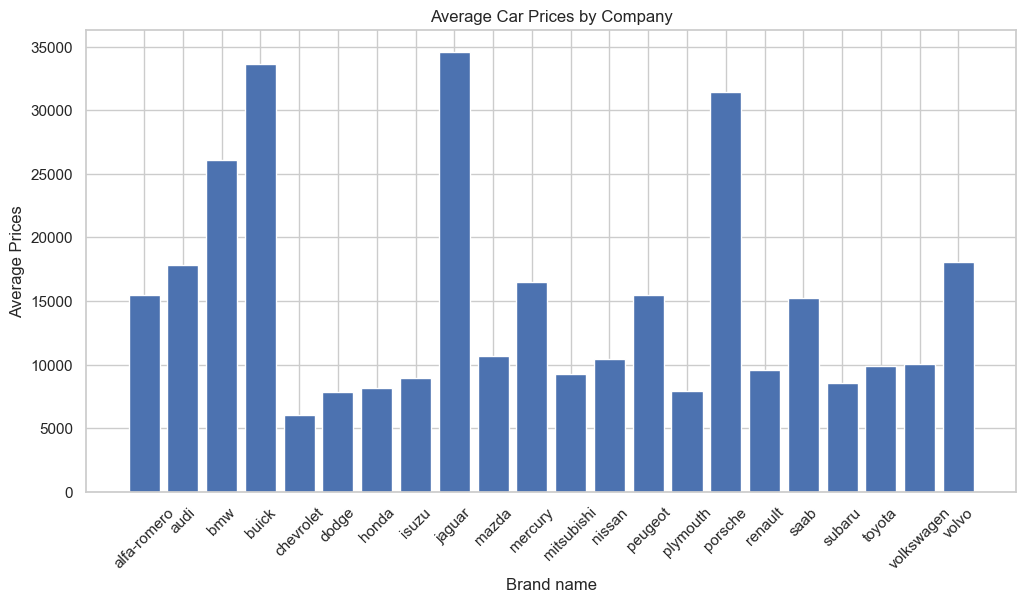

In [82]:
avg_price = data2.groupby('Company')['price'].mean().reset_index()
plt.figure(figsize=(12,6))
plt.bar(avg_price['Company'], avg_price['price'],align= 'center')
plt.xlabel('Brand name')
plt.ylabel('Average Prices')
plt.xticks(rotation=45)
plt.title('Average Car Prices by Company')
plt.show()

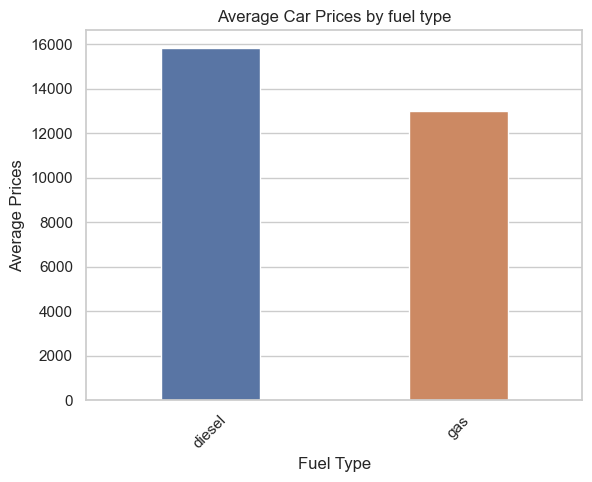

In [23]:
#using seaborn 
#Fuel type V/s Average price
avg_price = data2.groupby('fueltype')['price'].mean().reset_index()
sns.set(style="whitegrid")
sns.barplot(x='fueltype', y='price', data=avg_price,width=0.4)
plt.xlabel('Fuel Type')
plt.ylabel('Average Prices')
plt.xticks(rotation=45)
plt.title('Average Car Prices by fuel type')
plt.show()

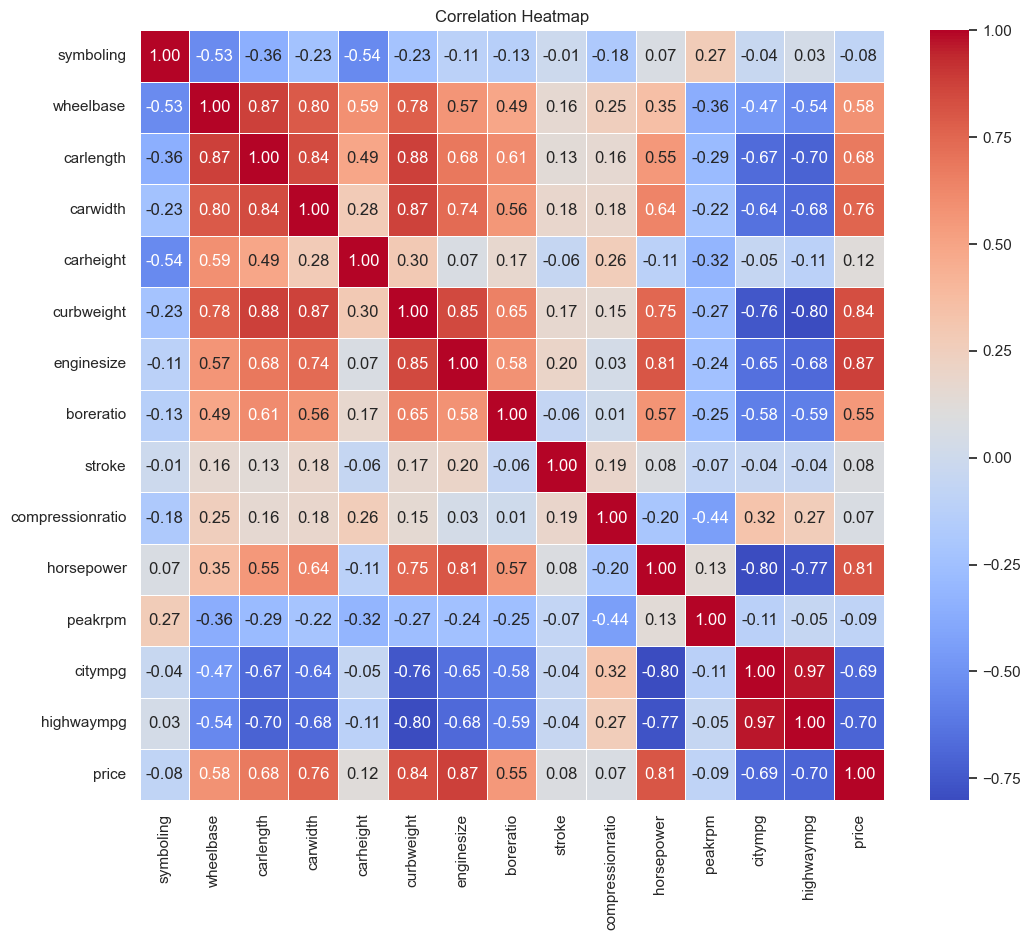

In [24]:
#correlation matrix
before_corr = data2.corr(numeric_only='TRUE')
plt.figure(figsize=(12, 10))
sns.heatmap(before_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


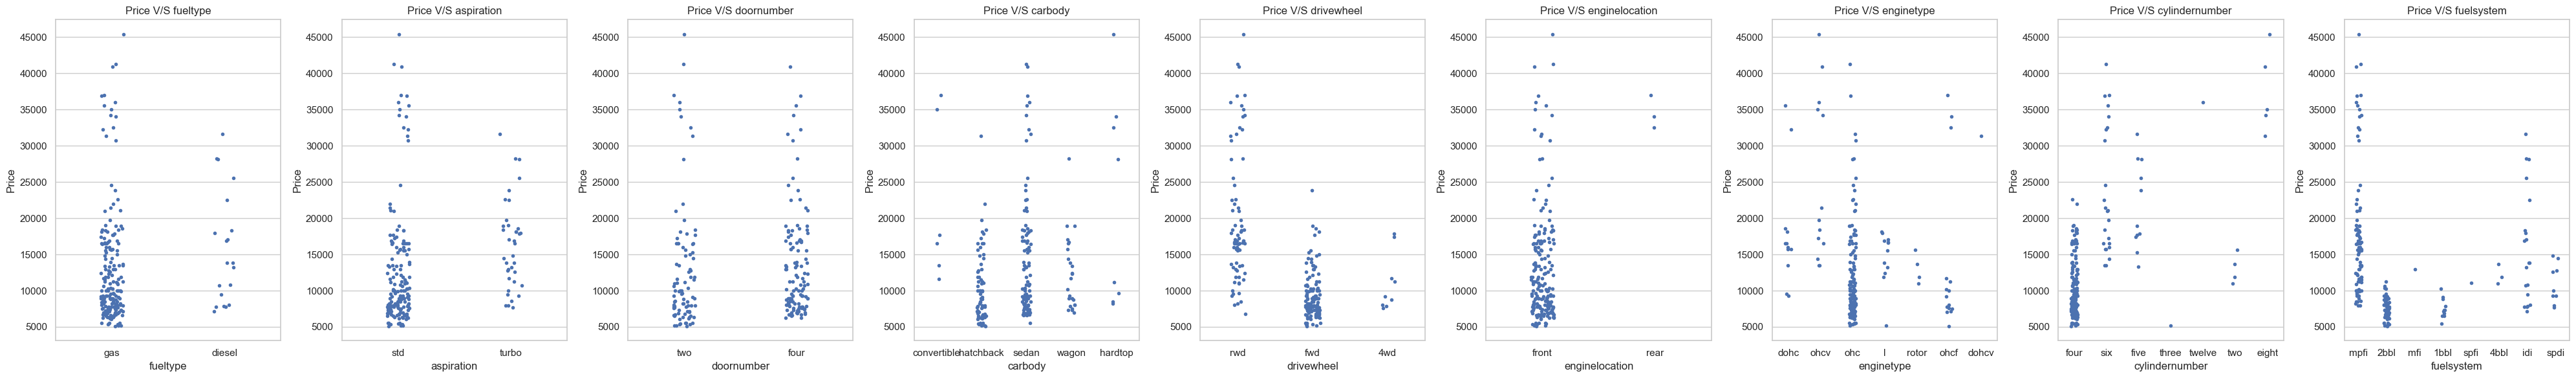

'Create Subplots:\n\n1.plt.subplots(1, len(cat_col), figsize=(40, 6)): This part is like saying, "I want one row (1),\n and each category in my list should have its own subplot." The len(cat_col) part ensures that\n you\'ll have as many subplots as there are categories in your list.\n\n2.Unpack Result:\n\nfig, axes = ...: This part is like saying, "I want to keep track of the whole figure (fig), \nand each subplot separately (axes)." The axes variable becomes an array where axes[0] \ncorresponds to the subplot for category A, axes[1] for category B, and axes[2] for category C.\n'

In [27]:
#Comparing price with categorical columns
fig, axes = plt.subplots(1, len(cat_col), figsize=(40, 6))  # Adjust the figsize as needed

for i, col in enumerate(cat_col):
    sns.stripplot(x=col, y='price', data=data2, size=4, ax=axes[i])
    axes[i].set_title(f"Price V/S {col}")
    axes[i].set_xlabel(f"{col}")
    axes[i].set_ylabel('Price')

plt.tight_layout()
plt.show()

'''Create Subplots:

1.plt.subplots(1, len(cat_col), figsize=(40, 6)): This part is like saying, "I want one row (1),
 and each category in my list should have its own subplot." The len(cat_col) part ensures that
 you'll have as many subplots as there are categories in your list.

2.Unpack Result:

fig, axes = ...: This part is like saying, "I want to keep track of the whole figure (fig), 
and each subplot separately (axes)." The axes variable becomes an array where axes[0] 
corresponds to the subplot for category A, axes[1] for category B, and axes[2] for category C.
'''

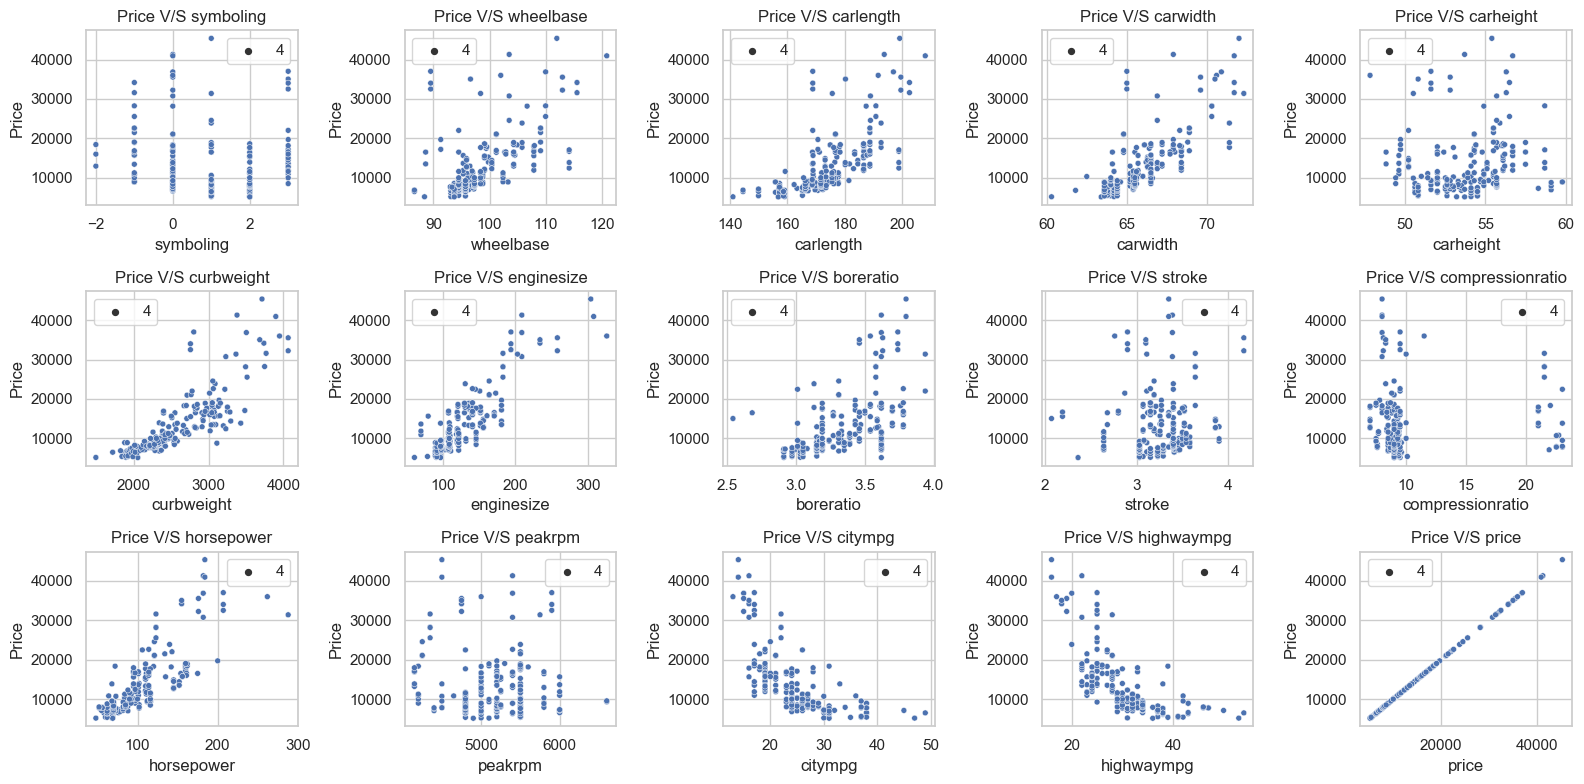

In [29]:
#Comparing price with numerical columns 
num_col = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 
              'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
              'citympg', 'highwaympg']

fig ,axes = plt.subplots(3,5,figsize=(16,8))
axes = axes.flatten() # Flatten the 2D array of subplots into a 1D array
for i,col in enumerate(num_col):
    sns.scatterplot(x=col ,y='price',data=data2 ,size=4 ,ax=axes[i])
    axes[i].set_title(f"Price V/S {col}")
    axes[i].set_xlabel(f"{col}")
    axes[i].set_ylabel('Price')
   
plt.tight_layout()
plt.show()


In [47]:
columns_to_drop = ['symboling','wheelbase','carlength','curbweight','highwaympg','doornumber','enginelocation','enginetype']
data0 = data2.drop(columns = columns_to_drop,axis = 1,errors='ignore')
print(data0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           205 non-null    object 
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   carwidth          205 non-null    float64
 6   carheight         205 non-null    float64
 7   cylindernumber    205 non-null    object 
 8   enginesize        205 non-null    int64  
 9   fuelsystem        205 non-null    object 
 10  boreratio         205 non-null    float64
 11  stroke            205 non-null    float64
 12  compressionratio  205 non-null    float64
 13  horsepower        205 non-null    int64  
 14  peakrpm           205 non-null    int64  
 15  citympg           205 non-null    int64  
 16  price             205 non-null    float64
dt

In [49]:
#converting categorical columns to one-hot
data3 = pd.get_dummies(data2,drop_first='TRUE')
print(data3.head(10))

   carwidth  carheight  enginesize  boreratio  stroke  compressionratio  \
0      64.1       48.8         130       3.47    2.68               9.0   
1      64.1       48.8         130       3.47    2.68               9.0   
2      65.5       52.4         152       2.68    3.47               9.0   
3      66.2       54.3         109       3.19    3.40              10.0   
4      66.4       54.3         136       3.19    3.40               8.0   
5      66.3       53.1         136       3.19    3.40               8.5   
6      71.4       55.7         136       3.19    3.40               8.5   
7      71.4       55.7         136       3.19    3.40               8.5   
8      71.4       55.9         131       3.13    3.40               8.3   
9      67.9       52.0         131       3.13    3.40               7.0   

   horsepower  peakrpm  citympg      price  ...  cylindernumber_three  \
0         111     5000       21  13495.000  ...                     0   
1         111     5000      

In [54]:
#checking Normal distribution curve using sns.histplot and kernel density estimate
# sorting all coulmns for Q_Q plot and shapiro test

df = data3.copy()
df_num = df.iloc[:,0:10]

num_col = ['carwidth', 'carheight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg','price']

for i in df_num.columns:
    df_num[i] = df_num[i].sort_values().values
    
print(df_num.head(5))

   carwidth  carheight  enginesize  boreratio  stroke  compressionratio  \
0      60.3       47.8          61       2.54    2.07               7.0   
1      61.8       48.8          70       2.68    2.19               7.0   
2      62.5       48.8          70       2.91    2.19               7.0   
3      63.4       49.4          70       2.91    2.36               7.0   
4      63.6       49.4          79       2.91    2.64               7.0   

   horsepower  peakrpm  citympg   price  
0          48     4150       13  5118.0  
1          52     4150       14  5151.0  
2          52     4150       14  5195.0  
3          55     4150       15  5348.0  
4          56     4150       15  5389.0  


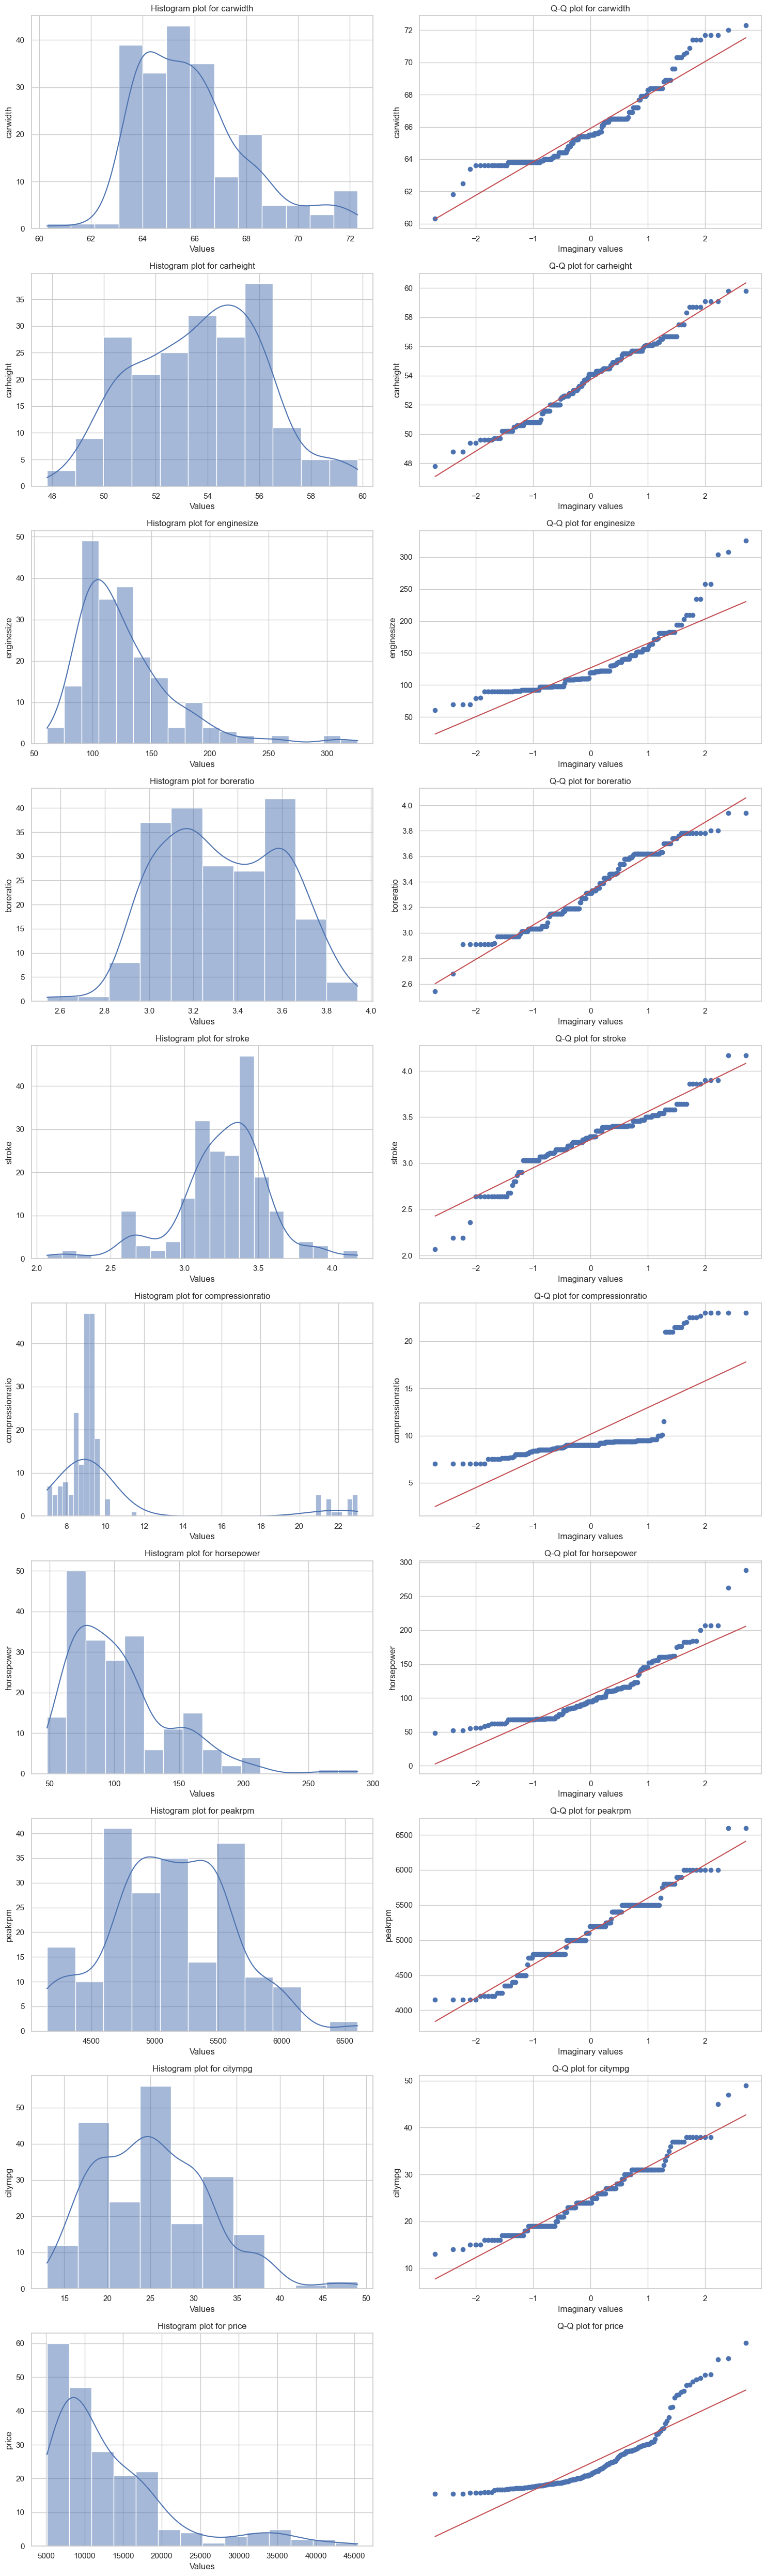

In [57]:
#1. HISTOGRAM (Normal distribution curve)
fig,axes = plt.subplots(len(num_col),2,figsize=(15, 5 * len(num_col)))
axes = axes.flatten()
for i,col in enumerate(num_col):
    sns.histplot(data=df_num[col],kde='TRUE',ax=axes[i*2])
    axes[i*2].set_title(f"Histogram plot for {col}")
    axes[i*2].set_xlabel(f"Values")
    axes[i*2].set_ylabel(f"{col}")
    
#2.Q-Q plot
for i,col in enumerate(num_col):
    stat.probplot(df_num[col],dist='norm',plot=axes[(2*i)+1])
    axes[(2*i)+1].set_title(f"Q-Q plot for {col}")
    axes[(2*i)+1].set_xlabel(f"Imaginary values")
    axes[(2*i)+1].set_ylabel(f"{col}")
    
axes[(2*i)+1].axis('off')  #used to turn off the axis 

plt.tight_layout()
plt.show()

In [59]:
#3.Shapiro wilk test
for i in df_num.columns:
     shapiro_stats, p_value = stat.shapiro(df_num[i])
     print(f"\nShapiro Wilk-Test for {i}:\nStatistics : {shapiro_stats}\np_value : {p_value}")
     
     if p_value > 0.05:
         print(f"/nData in {i} follows Normal Distribution\n")
     else:
        print(f"/nData in {i} does not follows Normal Distribution\n")
        
'''CONCLUSION - Thus df_num numeric data does not follows the normal distribution hence using 
                minmax_scale() for normalization of data'''


Shapiro Wilk-Test for carwidth:
Statistics : 0.9210780262947083
p_value : 5.012857240416224e-09
/nData in carwidth does not follows Normal Distribution


Shapiro Wilk-Test for carheight:
Statistics : 0.984231173992157
p_value : 0.02167491987347603
/nData in carheight does not follows Normal Distribution


Shapiro Wilk-Test for enginesize:
Statistics : 0.8294388651847839
p_value : 3.0569154792128156e-14
/nData in enginesize does not follows Normal Distribution


Shapiro Wilk-Test for boreratio:
Statistics : 0.9671851992607117
p_value : 0.00010420710168546066
/nData in boreratio does not follows Normal Distribution


Shapiro Wilk-Test for stroke:
Statistics : 0.9378023743629456
p_value : 1.0994884291903873e-07
/nData in stroke does not follows Normal Distribution


Shapiro Wilk-Test for compressionratio:
Statistics : 0.49774158000946045
p_value : 8.12114079238121e-24
/nData in compressionratio does not follows Normal Distribution


Shapiro Wilk-Test for horsepower:
Statistics : 0.883624

'CONCLUSION - Thus df_num numeric data does not follows the normal distribution hence using \n                minmax_scale() for normalization of data'

In [61]:
#normalizing numeric data with minmax() scale

from sklearn.preprocessing import minmax_scale
data4 = minmax_scale(data3)  #O/P will be in numpy.ndarray

#converting numpy.ndarray to DataFrame using pandas
data4 = pd.DataFrame(data4,columns=data3.columns)
print(data4.head(5))

   carwidth  carheight  enginesize  boreratio    stroke  compressionratio  \
0  0.316667   0.083333    0.260377   0.664286  0.290476            0.1250   
1  0.316667   0.083333    0.260377   0.664286  0.290476            0.1250   
2  0.433333   0.383333    0.343396   0.100000  0.666667            0.1250   
3  0.491667   0.541667    0.181132   0.464286  0.633333            0.1875   
4  0.508333   0.541667    0.283019   0.464286  0.633333            0.0625   

   horsepower   peakrpm   citympg     price  ...  cylindernumber_three  \
0    0.262500  0.346939  0.222222  0.207959  ...                   0.0   
1    0.262500  0.346939  0.222222  0.282558  ...                   0.0   
2    0.441667  0.346939  0.166667  0.282558  ...                   0.0   
3    0.225000  0.551020  0.305556  0.219254  ...                   0.0   
4    0.279167  0.551020  0.138889  0.306142  ...                   0.0   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0                    0.0   

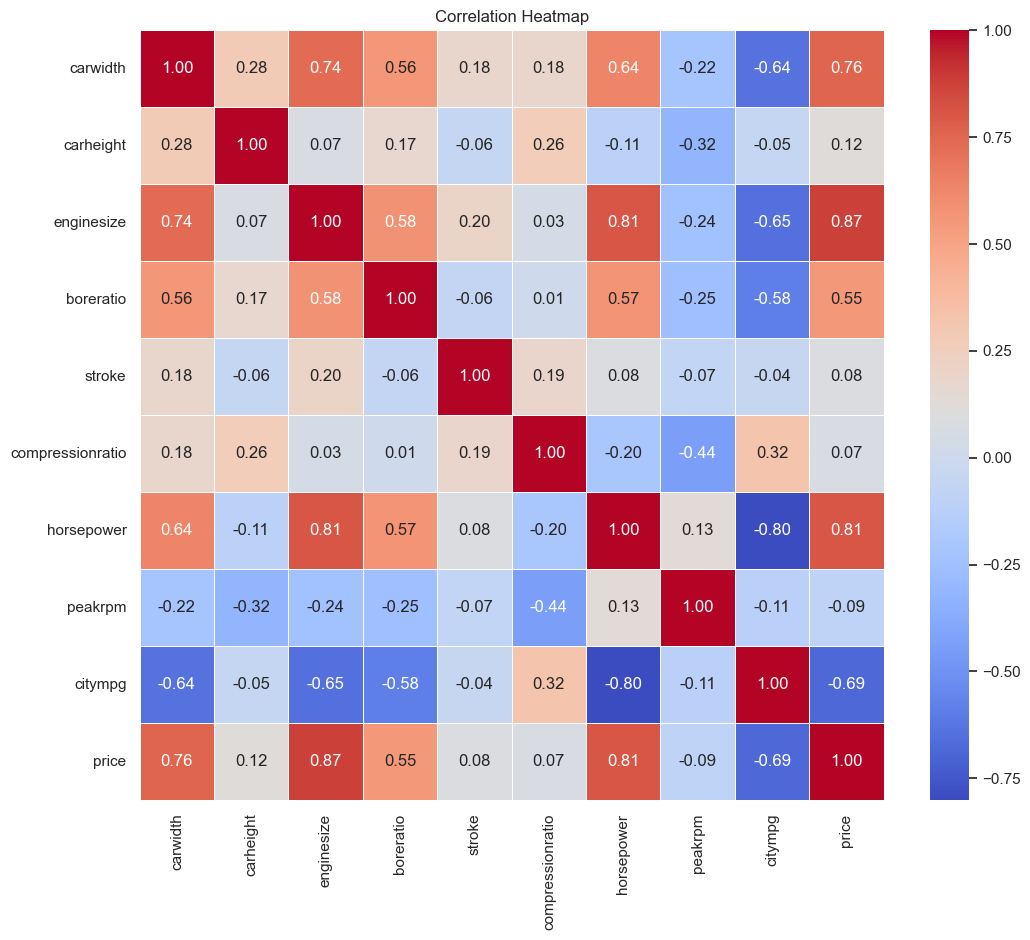

In [63]:
filtered_column = data4.iloc[:,0:10]
correlation = filtered_column.corr(numeric_only='TRUE')
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [64]:
#Spliting values in input and output
Y = data4[['price']]
X = data4.drop(['price'],axis =1)

In [65]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=1234)

'''Since ‘price’ is a continuous variable, it’s unusual to use stratification. 
Stratification is typically used for categorical/classification problems where the target 
variable is categorical.
'''

'Since ‘price’ is a continuous variable, it’s unusual to use stratification. \nStratification is typically used for categorical/classification problems where the target \nvariable is categorical.\n'

In [66]:
#import linear regression 
from sklearn.linear_model import LinearRegression,Lasso,Ridge
li_reg = LinearRegression()

#model training
li_reg.fit(X_train,Y_train)

#model prediction
Y_li_pred = li_reg.predict(X_test)

#slope and intercept
slope_li_reg = li_reg.coef_
intercept_li_reg = li_reg.intercept_

#checking for errors in model
from sklearn.metrics import mean_squared_error
import math as mt

RMSE_li_reg = mt.sqrt(mean_squared_error(Y_test,Y_li_pred))
print(f"Root Mean Square for linear regression= {RMSE_li_reg}")                 #392504951.5662341 

#MAE
from sklearn.metrics import mean_absolute_error
MAE_li_reg = mean_absolute_error(Y_test,Y_li_pred)  #61298974.901960544
print(f"Mean Absolute Error for linear regression= {MAE_li_reg}")    

#R-square
score_li_reg = li_reg.score(X_test,Y_test) #-8.777895174123062e+18
print(f"R-square for linear regression= {score_li_reg}")

Root Mean Square for linear regression= 0.09581318284373103
Mean Absolute Error for linear regression= 0.05799366351959635
R-square for linear regression= 0.4769410409826511


In [67]:
#import lasso regression
lasso = Lasso(alpha=0.0002774130705900127)
lasso.fit(X_train,Y_train)
Y_lasso_pred = lasso.predict(X_test)

#slope and intercept
slope_lasso_reg = lasso.coef_
intercept_lasso_reg = lasso.intercept_

nonzero_coefficients = np.sum(lasso.coef_ != 0)
print(f"Number of non-zero coefficients: {nonzero_coefficients}")

print("Lasso Coefficients:")
for feature, coef in zip(X.columns, lasso.coef_):
    print(f"{feature}: {coef}")

#RMSE
RMSE_lasso_reg = mt.sqrt(mean_squared_error(Y_test,Y_lasso_pred))
print(f"Root Mean Square for lasso regression= {RMSE_lasso_reg}")               #

#MAE
from sklearn.metrics import mean_absolute_error
MAE_lasso_reg = mean_absolute_error(Y_test,Y_lasso_pred)  #
print(f"Mean Absolute Error for lasso regression= {MAE_lasso_reg}")

#R-square
score_lasso_reg = lasso.score(X_test,Y_test) #
print(f"R-square for lasso regression= {score_lasso_reg}") 


'''
CROSS_VALIDATION FOR LASSO TO GET OPTIMUM VALUE OF APLHA
from sklearn.linear_model import LassoCV
 
lasso_cv = LassoCV(cv=20)
lasso_cv.fit(X_train, Y_train)
pred = lasso_cv.predict(X_test)
best_alpha = lasso_cv.alpha_

nonzero_coefficients = np.sum(lasso_cv.coef_ != 0)
print(f"Number of non-zero coefficients: {nonzero_coefficients}")'''

Number of non-zero coefficients: 39
Lasso Coefficients:
carwidth: 0.2774594805825301
carheight: 0.0
enginesize: 0.4990729799722451
boreratio: -0.0
stroke: -0.02138144935739768
compressionratio: -0.0
horsepower: 0.0
peakrpm: 0.07933497242075457
citympg: -0.009326072548838897
Company_audi: 0.07127071147964867
Company_bmw: 0.18843166608874473
Company_buick: 0.18760345366361914
Company_chevrolet: -0.0
Company_dodge: -0.02093443317405988
Company_honda: -0.008713318120164916
Company_isuzu: 0.021176439732321736
Company_jaguar: 0.09848370956454319
Company_mazda: -0.012235051007795575
Company_mercury: -0.0
Company_mitsubishi: -0.04345781370221279
Company_nissan: -0.027324411709617642
Company_peugeot: -0.004035024829070516
Company_plymouth: -0.024876814045602286
Company_porsche: 0.11326204682939907
Company_renault: -0.010869079831616522
Company_saab: 0.03486659860374216
Company_subaru: -0.02497153731417329
Company_toyota: -0.01017453879881773
Company_volkswagen: -0.0
Company_volvo: 0.02443505548

'\nCROSS_VALIDATION FOR LASSO TO GET OPTIMUM VALUE OF APLHA\nfrom sklearn.linear_model import LassoCV\n \nlasso_cv = LassoCV(cv=20)\nlasso_cv.fit(X_train, Y_train)\npred = lasso_cv.predict(X_test)\nbest_alpha = lasso_cv.alpha_\n\nnonzero_coefficients = np.sum(lasso_cv.coef_ != 0)\nprint(f"Number of non-zero coefficients: {nonzero_coefficients}")'

In [68]:
#import Ridge regression
ridge = Ridge(alpha=0.8)
ridge.fit(X_train,Y_train)
Y_ridge_pred = ridge.predict(X_test)

#slope and intercept
slope_ridge_reg = ridge.coef_
intercept_ridge_reg = ridge.intercept_

nonzero_coefficients = np.sum(ridge.coef_ != 0)
print(f"Number of non-zero coefficients: {nonzero_coefficients}")

print("Ridge Coefficients:")
for feature, coef in zip(X.columns, ridge.coef_):
    print(f"{feature}: {coef}")

#RMSE
RMSE_ridge_reg = mt.sqrt(mean_squared_error(Y_test,Y_ridge_pred))
print(f"Root Mean Square for ridge regression= {RMSE_ridge_reg}")               #

#MAE
from sklearn.metrics import mean_absolute_error
MAE_ridge_reg = mean_absolute_error(Y_test,Y_ridge_pred)  #
print(f"Mean Absolute Error for ridge regression= {MAE_ridge_reg}")

#R-square
score_ridge_reg = ridge.score(X_test,Y_test) #
print(f"R-square for ridge regression= {score_ridge_reg}")

Number of non-zero coefficients: 58
Ridge Coefficients:
carwidth: [ 0.20057391  0.02339298  0.22523968  0.0639421  -0.009699   -0.01736349
  0.12130478  0.03625702 -0.0499718   0.04187446  0.13472359  0.17577059
 -0.03014094 -0.04760899 -0.02235096  0.00990671  0.11982418 -0.0508972
 -0.03052751 -0.06094785 -0.06905383 -0.00801181 -0.04695416  0.09689149
 -0.03956493 -0.00128631 -0.08925041 -0.04991576 -0.03527768 -0.00132488
 -0.02239824  0.03427162  0.00599037 -0.03861564 -0.06622658 -0.04844058
 -0.05265106 -0.01175982 -0.00284988  0.10959541 -0.03394435 -0.0204024
  0.00663262  0.020345   -0.00676551 -0.00847583 -0.09680908 -0.12678282
 -0.00546833 -0.01239059 -0.00820507 -0.00847583  0.02043769 -0.00847583
  0.02239824  0.          0.01982995  0.00365192 -0.00399928]
Root Mean Square for ridge regression= 0.05754771496695693
Mean Absolute Error for ridge regression= 0.04256434089715466
R-square for ridge regression= 0.8113067875827529


In [69]:
#RainForest Regressor
#Ensemble learning
from sklearn.ensemble import RandomForestRegressor
import numpy as np

rfc = RandomForestRegressor(random_state=1234)

# Training
rfc.fit(X_train, np.ravel(Y_train.values))

# Prediction
Y_rfc_pred = rfc.predict(X_test)

#RMSE
RMSE_rfc_reg = mt.sqrt(mean_squared_error(Y_test,Y_rfc_pred))
print(f"Root Mean Square for rfc regression= {RMSE_rfc_reg}") #4.4%

#MAE
from sklearn.metrics import mean_absolute_error
MAE_rfc_reg = mean_absolute_error(Y_test,Y_rfc_pred)  #3.1%
print(f"Mean Absolute Error for rfc regression= {MAE_rfc_reg}")

#R-square
score_rfc_reg = rfc.score(X_test,Y_test) #88.9%
print(f"R-square for rfc regression= {score_rfc_reg}")

Root Mean Square for rfc regression= 0.04105048903500702
Mean Absolute Error for rfc regression= 0.02947135616378395
R-square for rfc regression= 0.9039855096657813


In [ ]:
NOTES = Some of data is missing like color of car that impacts price etc ... , 
find out many missing features as you can, hunt for more deep and similar datasets ,connect multiple dataset using sql or excel
merge them , dont explain your output in terms of programming language give the insight in simple english with graphs